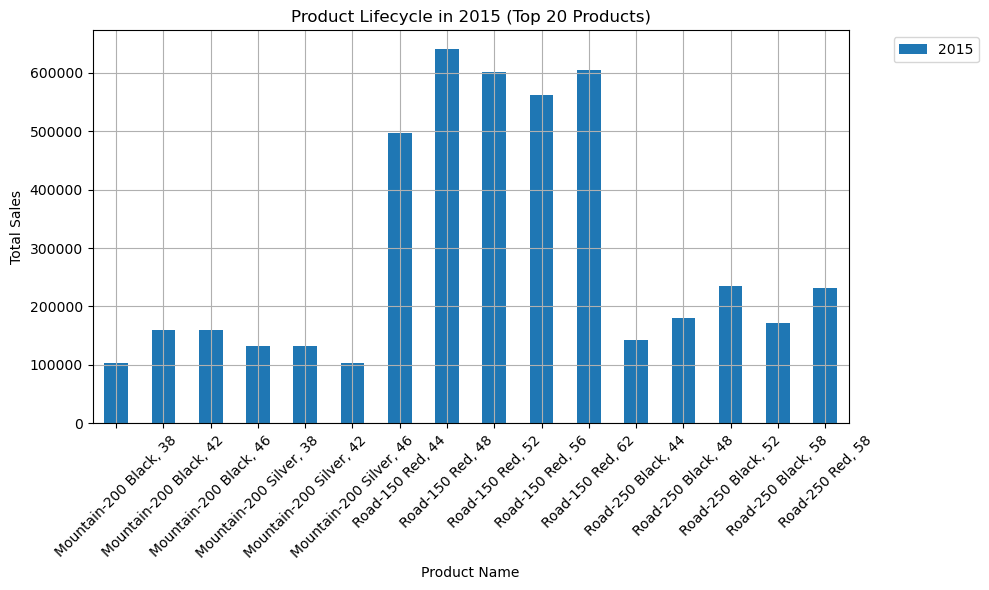

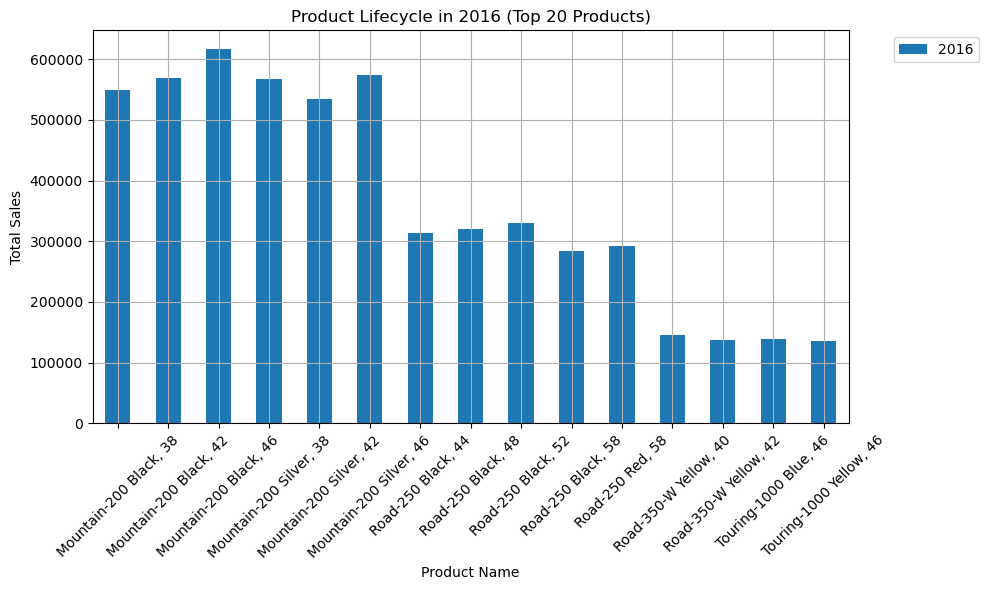

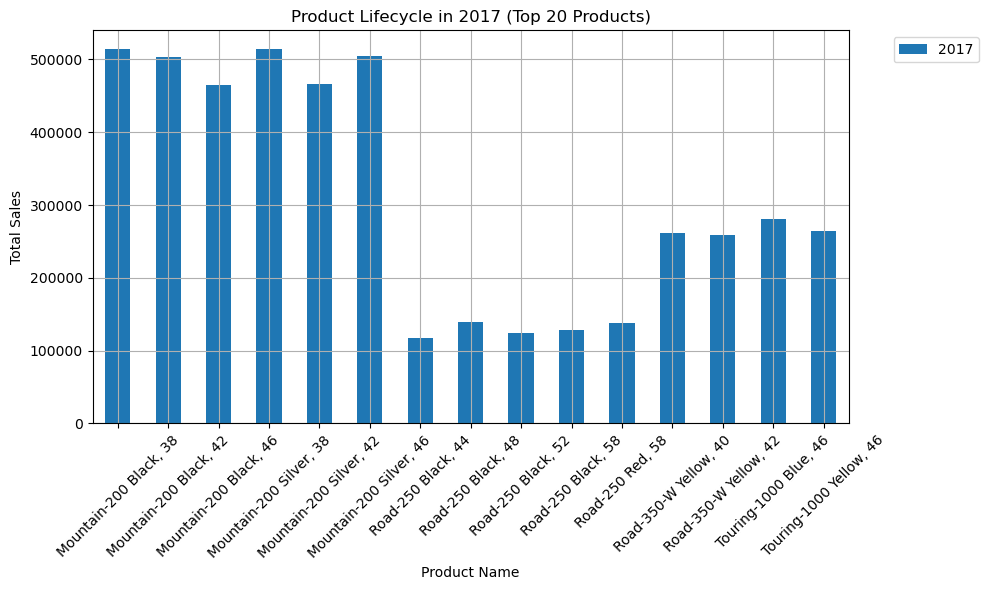

In [37]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect(r'C:\Users\Oluwafunmilayo Basil\Documents\EBUNOLUWA\AdventureWork_Database.db')

# Load product sales data
Sales_Products_2015_2017 = '''
SELECT 
    ProductName, 
    strftime('%Y', OrderDate) AS Year, 
    SUM(Revenue) AS TotalSales
FROM Sales_Products_2015_2017
GROUP BY ProductName, Year
ORDER BY ProductName, Year;
'''

# Read the query into a DataFrame
df_Sales_Products_2015_2017 = pd.read_sql(Sales_Products_2015_2017, conn)

# Calculate total sales for each product and filter top 20 products by sales
top_products = df_Sales_Products_2015_2017.groupby('ProductName')['TotalSales'].sum().nlargest(20).index

# Filter the DataFrame to only include the top 20 products
df_top_products = df_Sales_Products_2015_2017[df_Sales_Products_2015_2017['ProductName'].isin(top_products)]

# Now, separate the data for each year and create plots

# List of unique years
years = df_top_products['Year'].unique()

# Plot each year's product lifecycle separately
for year in years:
    df_year = df_top_products[df_top_products['Year'] == year]
    
    # Pivot the data for plotting
    df_pivot_year = df_year.pivot(index='ProductName', columns='Year', values='TotalSales')

    # Plot for the specific year
    df_pivot_year.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Product Lifecycle in {year} (Top 20 Products)')
    plt.xlabel('Product Name')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


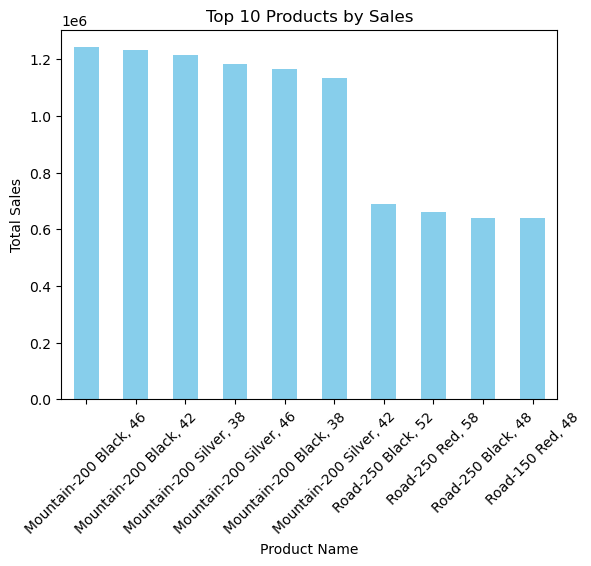

In [21]:
# Query to get sales distribution by product
top_products_query = '''
SELECT 
    ProductName, 
    SUM(Revenue) AS TotalSales
FROM Sales_Products_2015_2017
GROUP BY ProductName
ORDER BY TotalSales DESC
LIMIT 10;
'''

df_top_products = pd.read_sql(top_products_query, conn)

# Plot bar chart for sales distribution
df_top_products.plot(kind='bar', x='ProductName', y='TotalSales', color='skyblue', legend=False)
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()


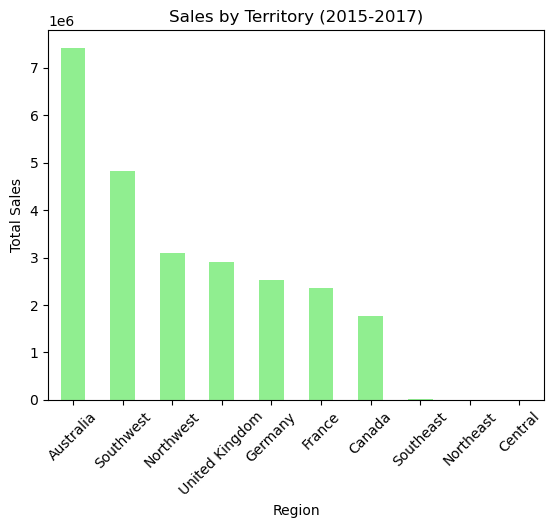

In [23]:
# Query to get sales by region
territory_sales_query = '''
SELECT 
    T.Region,
    SUM(SP.Revenue) AS TotalSales
FROM Sales_Products_2015_2017 AS SP
JOIN AdventureWorks_Territories AS T ON SP.TerritoryKey = T.SalesTerritoryKey
GROUP BY T.Region
ORDER BY TotalSales DESC;
'''

df_territory_sales = pd.read_sql(territory_sales_query, conn)

# Plot bar chart for sales by territory
df_territory_sales.plot(kind='bar', x='Region', y='TotalSales', color='lightgreen', legend=False)
plt.title('Sales by Territory (2015-2017)')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


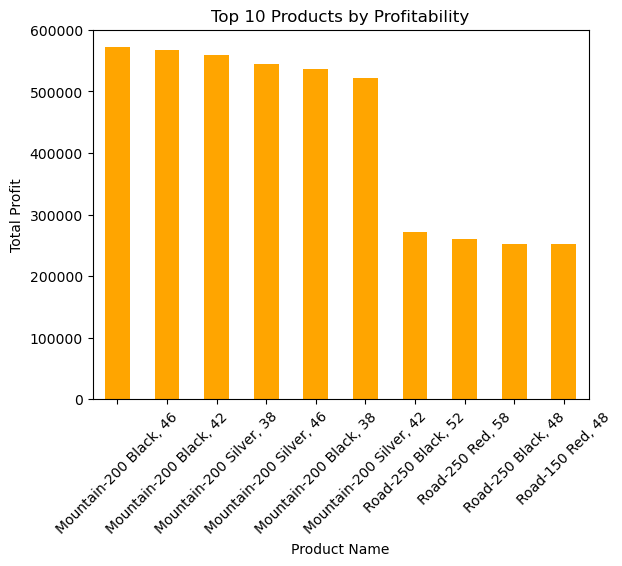

In [25]:
# Query for product profitability
profit_query = '''
SELECT 
    ProductName,
    SUM(OrderQuantity * (ProductPrice - ProductCost)) AS TotalProfit
FROM Sales_Products_2015_2017
GROUP BY ProductName
ORDER BY TotalProfit DESC
LIMIT 10;
'''

df_profit = pd.read_sql(profit_query, conn)

# Plot bar chart for product profitability
df_profit.plot(kind='bar', x='ProductName', y='TotalProfit', color='orange', legend=False)
plt.title('Top 10 Products by Profitability')
plt.ylabel('Total Profit')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()


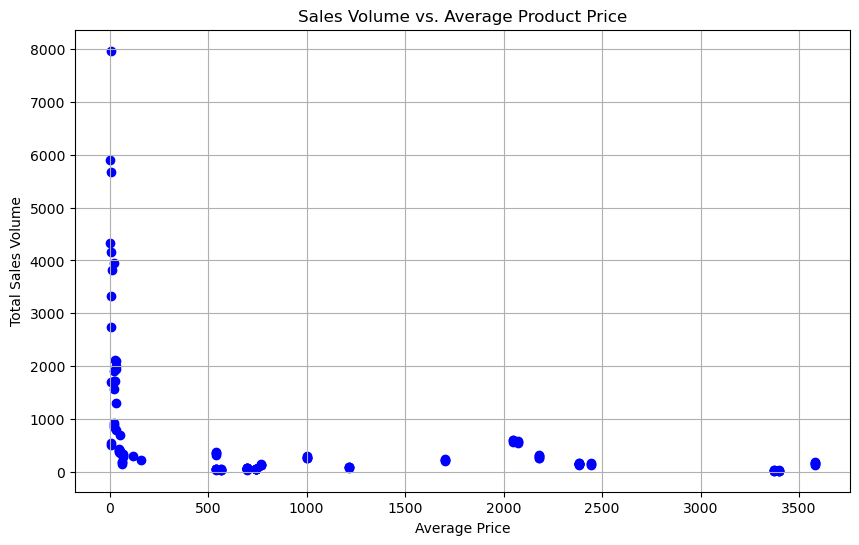

In [27]:
# Query for sales volume vs. price
volume_price_query = '''
SELECT 
    ProductName,
    SUM(OrderQuantity) AS TotalSalesVolume,
    AVG(ProductPrice) AS AvgPrice
FROM Sales_Products_2015_2017
GROUP BY ProductName
ORDER BY TotalSalesVolume DESC;
'''

df_volume_price = pd.read_sql(volume_price_query, conn)

# Scatter plot for sales volume vs. price
plt.figure(figsize=(10,6))
plt.scatter(df_volume_price['AvgPrice'], df_volume_price['TotalSalesVolume'], color='blue')
plt.title('Sales Volume vs. Average Product Price')
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()


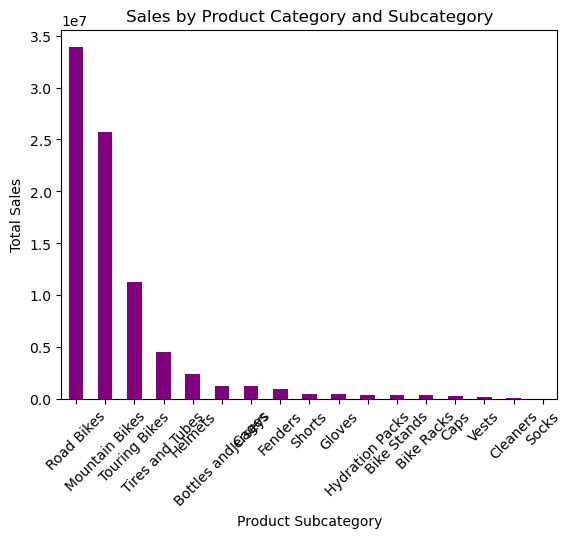

In [35]:
# Query for product sales by category
category_sales_query = '''
SELECT 
    C.CategoryName, 
    SC.SubcategoryName,
    SUM(SP.Revenue) AS TotalSales
FROM Sales_Products_2015_2017 AS SP
JOIN AdventureWork_Product_Categories AS C ON SP.ProductCategoryKey = C.ProductCategoryKey
JOIN AdventureWorks_Product_Subcategories AS SC ON SP.ProductSubcategoryKey = SC.ProductSubcategoryKey
GROUP BY C.CategoryName, SC.SubcategoryName
ORDER BY TotalSales DESC;
'''

df_category_sales = pd.read_sql(category_sales_query, conn)

# Bar chart for sales by product category and subcategory
df_category_sales.plot(kind='bar', x='SubcategoryName', y='TotalSales', color='purple', legend=False)
plt.title('Sales by Product Category and Subcategory')
plt.ylabel('Total Sales')
plt.xlabel('Product Subcategory')
plt.xticks(rotation=45)
plt.show()
